In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data=pd.read_csv("income_evaluation.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
df.columns=map(lambda x:x.replace(" ",""),df.columns)

In [60]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [62]:
numeric_features=df.select_dtypes(include="number").columns
categorical_features=df.select_dtypes(exclude="number").columns

In [63]:
import pipename as pn

In [65]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [67]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [68]:
full_processor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipeline, categorical_features),
        ('numerical', numerical_pipeline, numeric_features)
    ])

In [69]:
pipe = Pipeline(steps=[
    ('full_processor', full_processor)
])

In [70]:
dataset=pipe.fit_transform(df)

In [71]:
columns=pn.get_feature_names(full_processor)
columns

['encoder__x0_ ?',
 'encoder__x0_ Federal-gov',
 'encoder__x0_ Local-gov',
 'encoder__x0_ Never-worked',
 'encoder__x0_ Private',
 'encoder__x0_ Self-emp-inc',
 'encoder__x0_ Self-emp-not-inc',
 'encoder__x0_ State-gov',
 'encoder__x0_ Without-pay',
 'encoder__x1_ 10th',
 'encoder__x1_ 11th',
 'encoder__x1_ 12th',
 'encoder__x1_ 1st-4th',
 'encoder__x1_ 5th-6th',
 'encoder__x1_ 7th-8th',
 'encoder__x1_ 9th',
 'encoder__x1_ Assoc-acdm',
 'encoder__x1_ Assoc-voc',
 'encoder__x1_ Bachelors',
 'encoder__x1_ Doctorate',
 'encoder__x1_ HS-grad',
 'encoder__x1_ Masters',
 'encoder__x1_ Preschool',
 'encoder__x1_ Prof-school',
 'encoder__x1_ Some-college',
 'encoder__x2_ Divorced',
 'encoder__x2_ Married-AF-spouse',
 'encoder__x2_ Married-civ-spouse',
 'encoder__x2_ Married-spouse-absent',
 'encoder__x2_ Never-married',
 'encoder__x2_ Separated',
 'encoder__x2_ Widowed',
 'encoder__x3_ ?',
 'encoder__x3_ Adm-clerical',
 'encoder__x3_ Armed-Forces',
 'encoder__x3_ Craft-repair',
 'encoder__x3_ 

In [72]:
dataset=pipe.transform(df)

In [73]:
p_data=pd.DataFrame(dataset.toarray(), columns=columns)

In [74]:
p_data

,encoder__x0_ ?,encoder__x0_ Federal-gov,encoder__x0_ Local-gov,encoder__x0_ Never-worked,encoder__x0_ Private,encoder__x0_ Self-emp-inc,encoder__x0_ Self-emp-not-inc,encoder__x0_ State-gov,encoder__x0_ Without-pay,encoder__x1_ 10th,...,encoder__x7_ Vietnam,encoder__x7_ Yugoslavia,encoder__x8_ <=50K,encoder__x8_ >50K,numerical__age,numerical__fnlwgt,numerical__education-num,numerical__capital-gain,numerical__capital-loss,numerical__hours-per-week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [75]:
p_data.to_csv("el.csv")

In [57]:
from sklearn.linear_model import LogisticRegression

In [93]:
X=p_data.drop(["encoder__x8_ <=50K","encoder__x8_ >50K"],axis=1)
y=p_data["encoder__x8_ <=50K"]

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.23,random_state=42)

In [94]:
model=LogisticRegression()

In [95]:
model.fit(X_train,y_train)

LogisticRegression()

In [96]:
model.score(X_train,y_train)

0.8522595827848909

In [97]:
model.score(X_test,y_test)

0.8555407209612818

In [98]:
from xgboost import XGBClassifier

xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [99]:
xgbt.fit(X_train, y_train)

[11:38:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimarors=10,
              n_estimators=100, n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [100]:
xgbt.score(X_train, y_train)

0.8668581229308763

In [101]:
xgbt.score(X_test, y_test)

0.8674232309746328

In [102]:
xgbt_pred = xgbt.predict(X_test)

In [104]:
from sklearn import metrics

print(metrics.classification_report(y_test, xgbt_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.60      0.68      1780
         1.0       0.88      0.95      0.92      5710

    accuracy                           0.87      7490
   macro avg       0.84      0.78      0.80      7490
weighted avg       0.86      0.87      0.86      7490



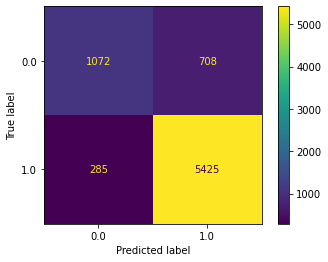

In [103]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgbt, X_test, y_test)
plt.show()